### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


O Faturamento total da Loja é: 1534509.12
O Faturamento total da Loja2 é: 1488459.06
O Faturamento total da Loja3 é: 1464025.03
O Faturamento total da Loja4 é: 1384497.58


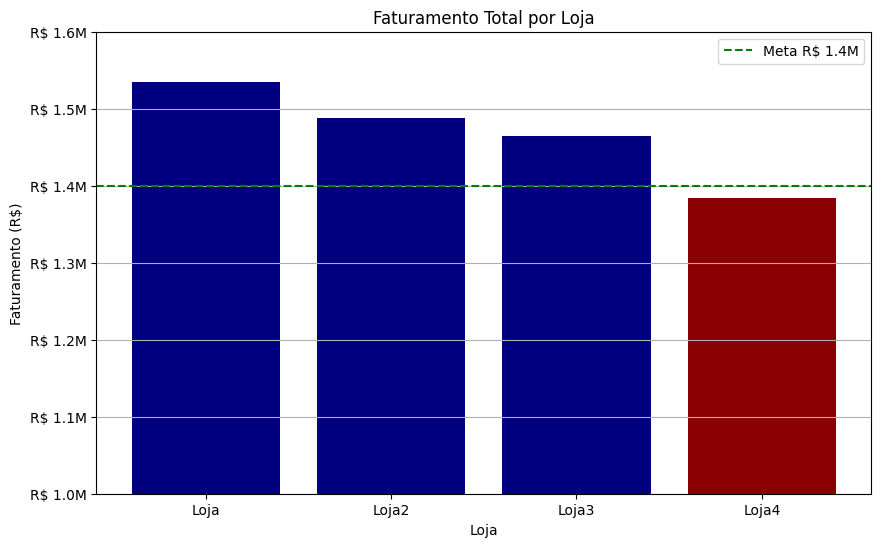

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


lojas = {
    "Loja": loja,
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4,
}

faturamento_totais = []

for nome_loja, dataframe in lojas.items():
    faturamento_total = dataframe['Preço'].sum()
    faturamento_totais.append(faturamento_total)
    print(f"O Faturamento total da {nome_loja} é: {faturamento_total:.2f}")


cores = ['#8B0000' if total < 1.4e6 else '#000080' for total in faturamento_totais]


def formatar_valor(x, pos):
    return f'R$ {x / 1e6:.1f}M'

plt.figure(figsize=(10, 6))
plt.bar(lojas.keys(), faturamento_totais, color=cores)


plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')


plt.ylim(1.0e6, 1.6e6)


plt.axhline(y=1.4e6, color='green', linestyle='--', label='Meta R$ 1.4M')


plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(formatar_valor))

plt.grid(axis='y')
plt.legend()
plt.show()


# 2. Vendas por Categoria


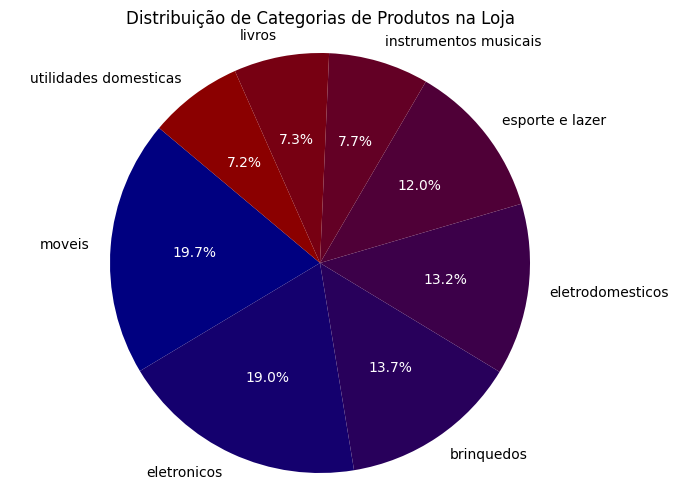

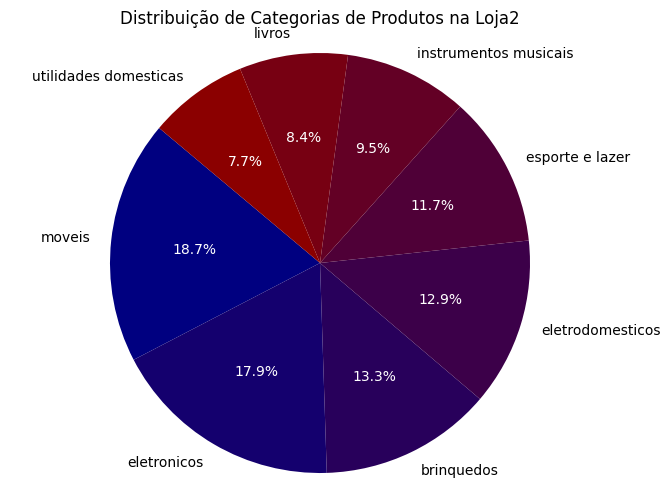

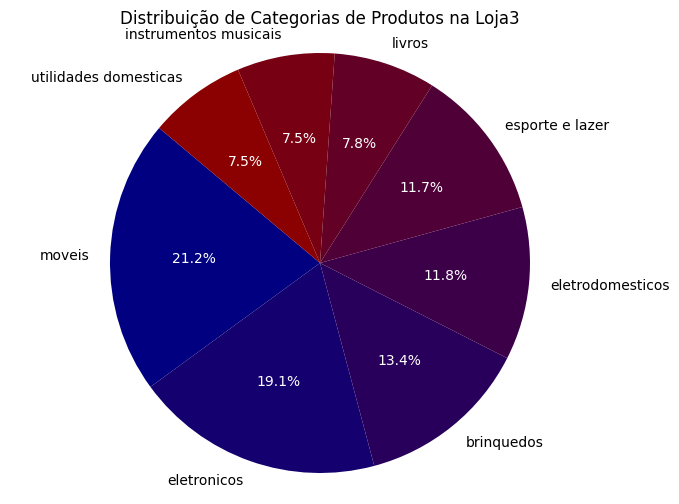

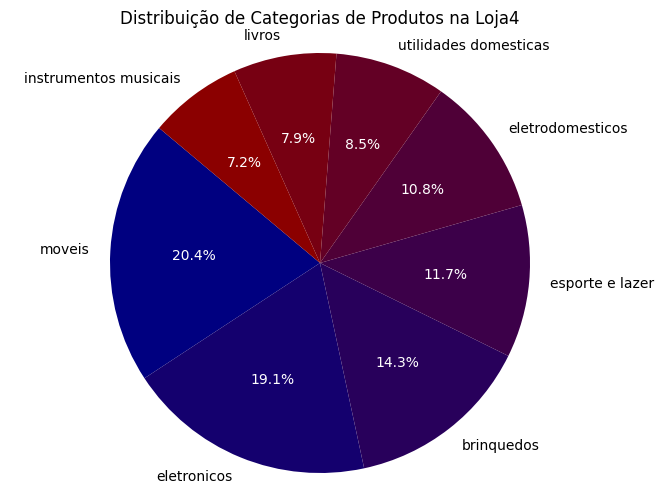

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


lojas = {
    "Loja": loja,
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4,
}

def interpolate_colors(color1, color2, steps):
    """Função para interpolar entre duas cores"""
    return [color1 * (1 - i / (steps - 1)) + color2 * (i / (steps - 1)) for i in range(steps)]


azul_marinhos = np.array([0, 0, 128]) / 255
vermelho_vinho = np.array([139, 0, 0]) / 255

for nome_loja, dataframe in lojas.items():

    categoria_vendas = dataframe.groupby('Categoria do Produto')['Produto'].count().reset_index()
    categoria_vendas.columns = ['Categoria', 'Quantidade']


    categoria_vendas = categoria_vendas.sort_values(by='Quantidade', ascending=False)


    cores = interpolate_colors(azul_marinhos, vermelho_vinho, len(categoria_vendas))

    plt.figure(figsize=(8, 6))

    def custom_autopct(pct):
        return f'{pct:.1f}%'

    wedges, texts, autotexts = plt.pie(categoria_vendas['Quantidade'],
                                        labels=categoria_vendas['Categoria'],
                                        autopct=custom_autopct,
                                        startangle=140,
                                        colors=cores)


    for autotext in autotexts:
        autotext.set_color('white')
    for text in texts:
        text.set_color('black')

    plt.title(f'Distribuição de Categorias de Produtos na {nome_loja}')
    plt.axis('equal')
    plt.show()

# 3. Média de Avaliação das Lojas

A média das avaliações na Loja é: 3.98
A média das avaliações na Loja2 é: 4.04
A média das avaliações na Loja3 é: 4.05
A média das avaliações na Loja4 é: 4.00


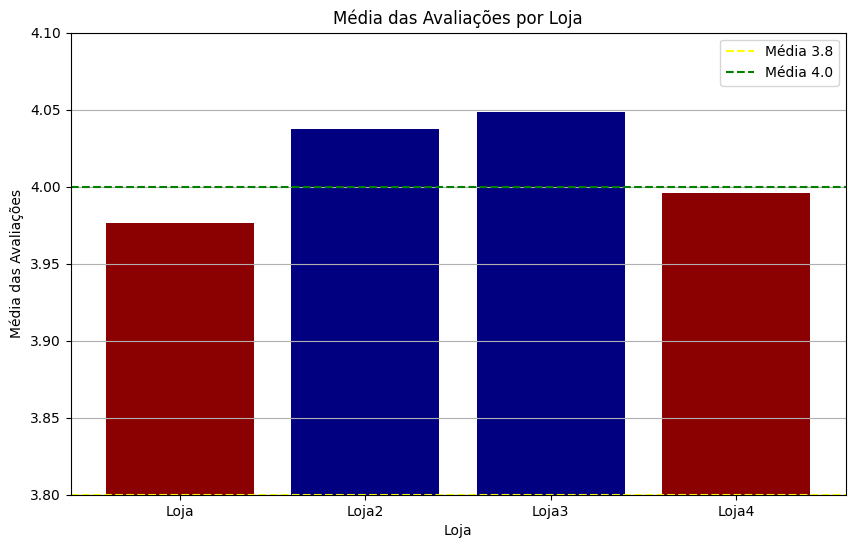

In [ ]:
import matplotlib.pyplot as plt

lojas = {
    "Loja": loja,
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4,
}

nomes_lojas = []
media_avaliacoes = []

for nome_loja, dataframe in lojas.items():
    media_avaliacao = dataframe['Avaliação da compra'].mean()
    nomes_lojas.append(nome_loja)
    media_avaliacoes.append(media_avaliacao)
    print(f"A média das avaliações na {nome_loja} é: {media_avaliacao:.2f}")

cores = ['#8B0000' if nota < 4 else '#000080' for nota in media_avaliacoes]

plt.figure(figsize=(10, 6))
plt.bar(nomes_lojas, media_avaliacoes, color=cores)
plt.title('Média das Avaliações por Loja')
plt.xlabel('Loja')
plt.ylabel('Média das Avaliações')
plt.ylim(3.8, 4.10)
plt.grid(axis='y')
plt.axhline(y=3.8, color='yellow', linestyle='--', label='Média 3.8')
plt.axhline(y=4.0, color='green', linestyle='--', label='Média 4.0')
plt.legend()
plt.show()

# 4. Produtos Mais e Menos Vendidos

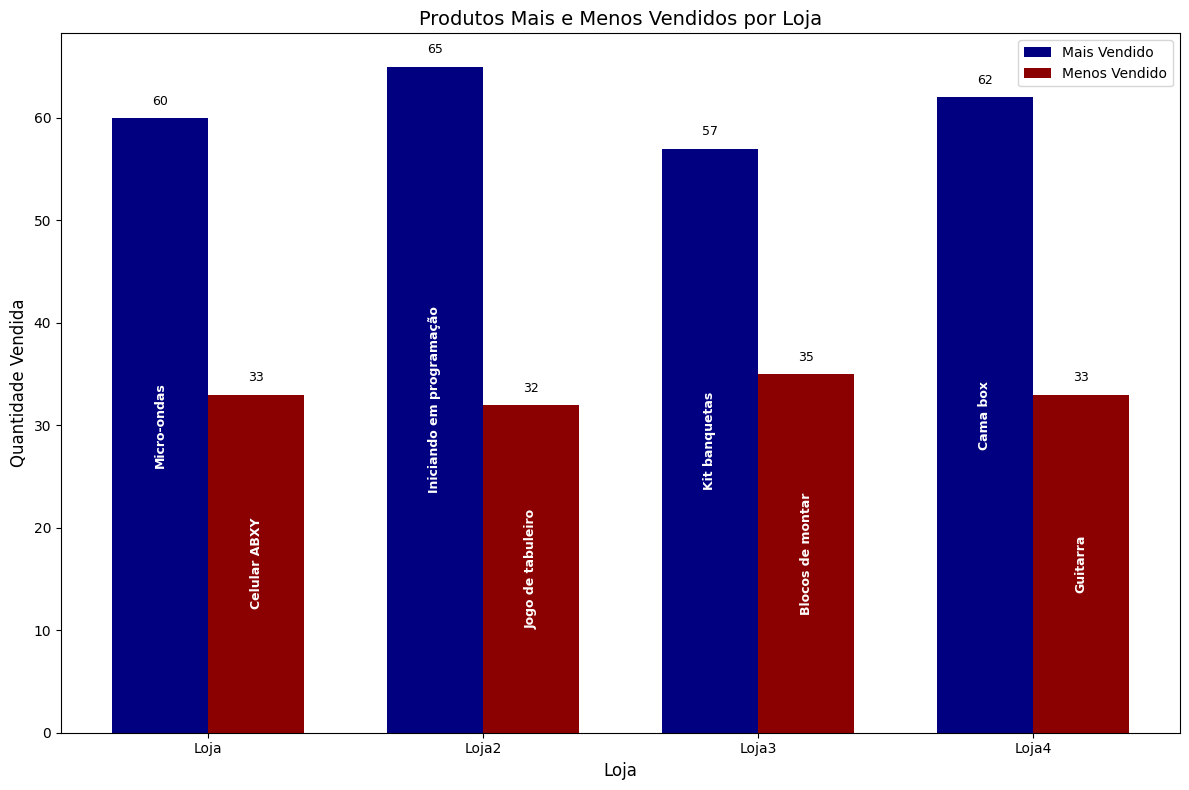

In [ ]:
import matplotlib.pyplot as plt

lojas = {
    "Loja": loja,
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4,
}

nomes_lojas = []
produtos_mais_vendidos = []
produtos_menos_vendidos = []
quantidade_mais_vendida = []
quantidade_menos_vendida = []

for nome_loja, dataframe in lojas.items():
    produto_vendas = dataframe['Produto'].value_counts().reset_index()
    produto_vendas.columns = ['Produto', 'Quantidade']

    produto_mais_vendido = produto_vendas.iloc[0]
    produto_menos_vendido = produto_vendas.iloc[-1]

    nomes_lojas.append(nome_loja)
    produtos_mais_vendidos.append(produto_mais_vendido['Produto'])
    produtos_menos_vendidos.append(produto_menos_vendido['Produto'])
    quantidade_mais_vendida.append(produto_mais_vendido['Quantidade'])
    quantidade_menos_vendida.append(produto_menos_vendido['Quantidade'])

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = range(len(nomes_lojas))

# Criando as barras
bar1 = ax.bar(index, quantidade_mais_vendida, bar_width, label='Mais Vendido', color='#000080')
bar2 = ax.bar([i + bar_width for i in index], quantidade_menos_vendida, bar_width, label='Menos Vendido', color='#8B0000')

# Configurações do gráfico
ax.set_xlabel('Loja', fontsize=12)
ax.set_ylabel('Quantidade Vendida', fontsize=12)
ax.set_title('Produtos Mais e Menos Vendidos por Loja', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(nomes_lojas, fontsize=10)
ax.legend(fontsize=10)

# Adicionando os nomes dos produtos nas barras
for i, (bar_mais, bar_menos) in enumerate(zip(bar1, bar2)):
    # Para os produtos mais vendidos
    height_mais = bar_mais.get_height()
    ax.text(bar_mais.get_x() + bar_mais.get_width()/2, height_mais/2,
            produtos_mais_vendidos[i],
            ha='center', va='center', color='white', fontsize=9, fontweight='bold',
            rotation=90, wrap=True)

    # Para os produtos menos vendidos
    height_menos = bar_menos.get_height()
    ax.text(bar_menos.get_x() + bar_menos.get_width()/2, height_menos/2,
            produtos_menos_vendidos[i],
            ha='center', va='center', color='white', fontsize=9, fontweight='bold',
            rotation=90, wrap=True)

    # Adicionando os valores numéricos em cima das barras
    ax.text(bar_mais.get_x() + bar_mais.get_width()/2, height_mais + 1,
            f'{height_mais}', ha='center', va='bottom', fontsize=9)

    ax.text(bar_menos.get_x() + bar_menos.get_width()/2, height_menos + 1,
            f'{height_menos}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


A média de frete na Loja é: 34.69
A média de frete na Loja2 é: 33.62
A média de frete na Loja3 é: 33.07
A média de frete na Loja4 é: 31.28


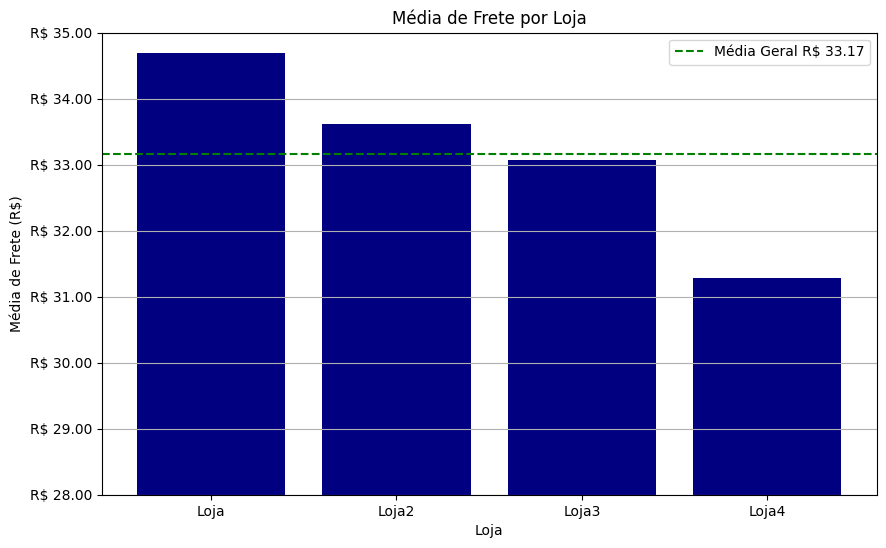

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


lojas = {
    "Loja": loja,
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4,
}

nomes_lojas = []
media_fretes = []


for nome_loja, dataframe in lojas.items():
    media_frete = dataframe['Frete'].mean()
    nomes_lojas.append(nome_loja)
    media_fretes.append(media_frete)
    print(f"A média de frete na {nome_loja} é: {media_frete:.2f}")


media_geral_frete = np.mean(media_fretes)


plt.figure(figsize=(10, 6))
plt.bar(nomes_lojas, media_fretes, color='#000080')


plt.title('Média de Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Frete (R$)')
plt.ylim(28.0, 35.0)


plt.axhline(y=media_geral_frete, color='green', linestyle='--', label=f'Média Geral R$ {media_geral_frete:.2f}')


def formatar_valor(x, pos):
    return f'R$ {x:.2f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formatar_valor))
plt.grid(axis='y')
plt.legend()
plt.show()

Essa análise tem como objetivo ajudar a Loja Seu João a potencializar suas vendas através dos dados que a mesma apresenta, com o registro retirado de suas planilhas conseguimos levantar comparativo com dados e por fim realizar uma plano estratégico.

Primeiro levamos em conta a análise de faturamento total das lojas, e traçamos junto ao time de vendas uma meta inicial de 14 milhoes para as mesmas, quase todas conseguiram atingir essa futura meta com base nos dados do passado, ficando apenas a Loja4 para correr atrás desse número como podem ver abaixo no gráfico:

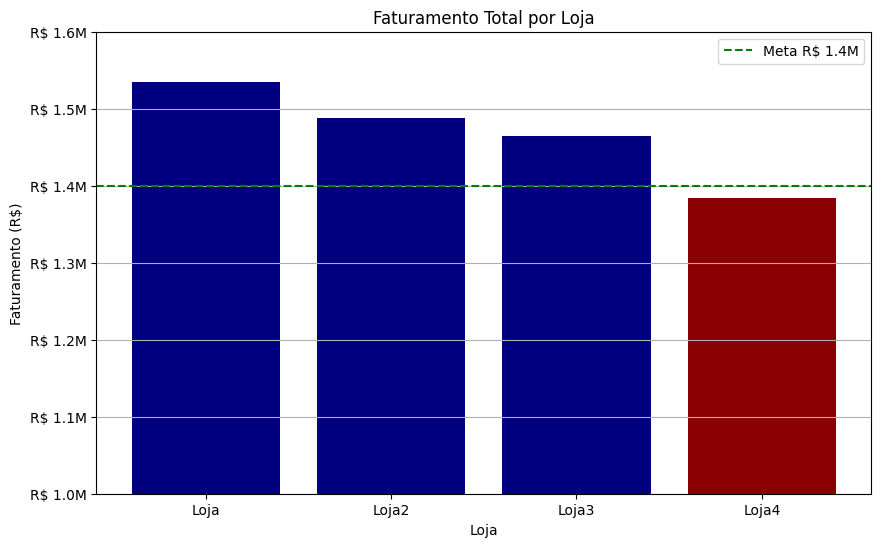



Em seguida tratamos de entender melhor como era a parcela de produtos mais e menos vendidos da loja Seu João e tivemos o seguinte gráfico:

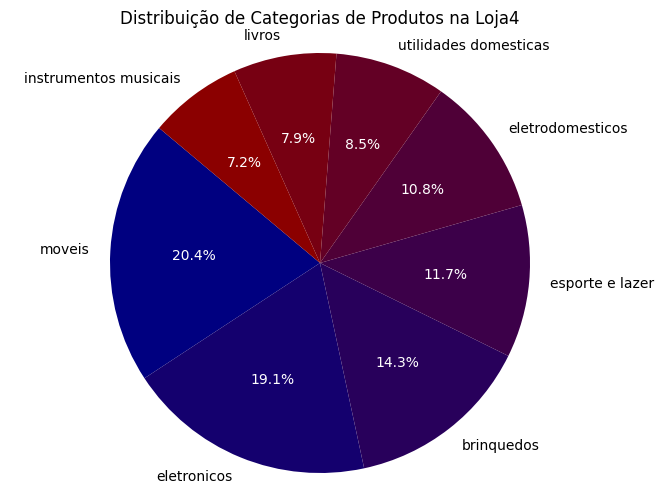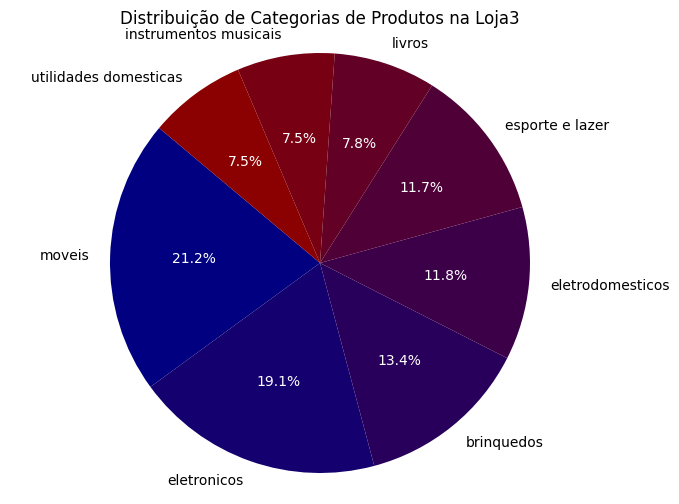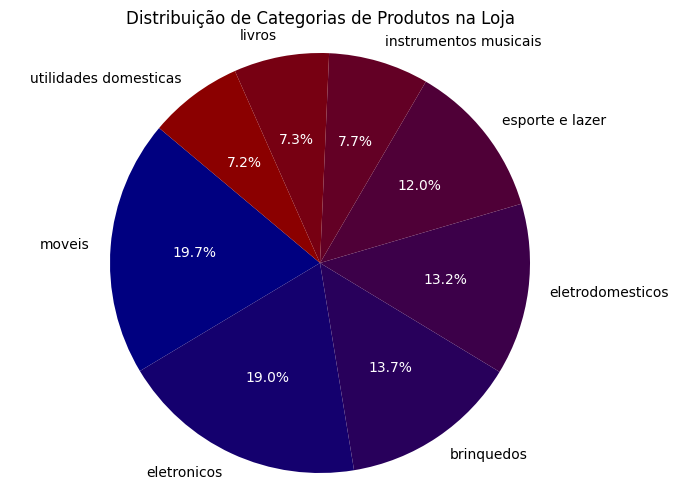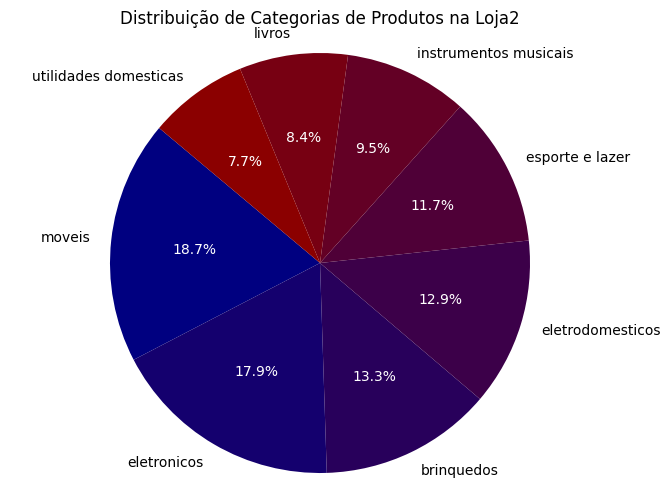

A análise de dados apontou uma boa diversificação nos produtos do Seu joão, e apesar de ter mais vendas em um setor mais pontual, acreditamos que deva manter suas vendas mais abrangentes para trazer o maior número possível de consumidores para sua loja em uma lógica de mercado.

O produto mais vendido e menos vendido de cada loja foi também avaliado:

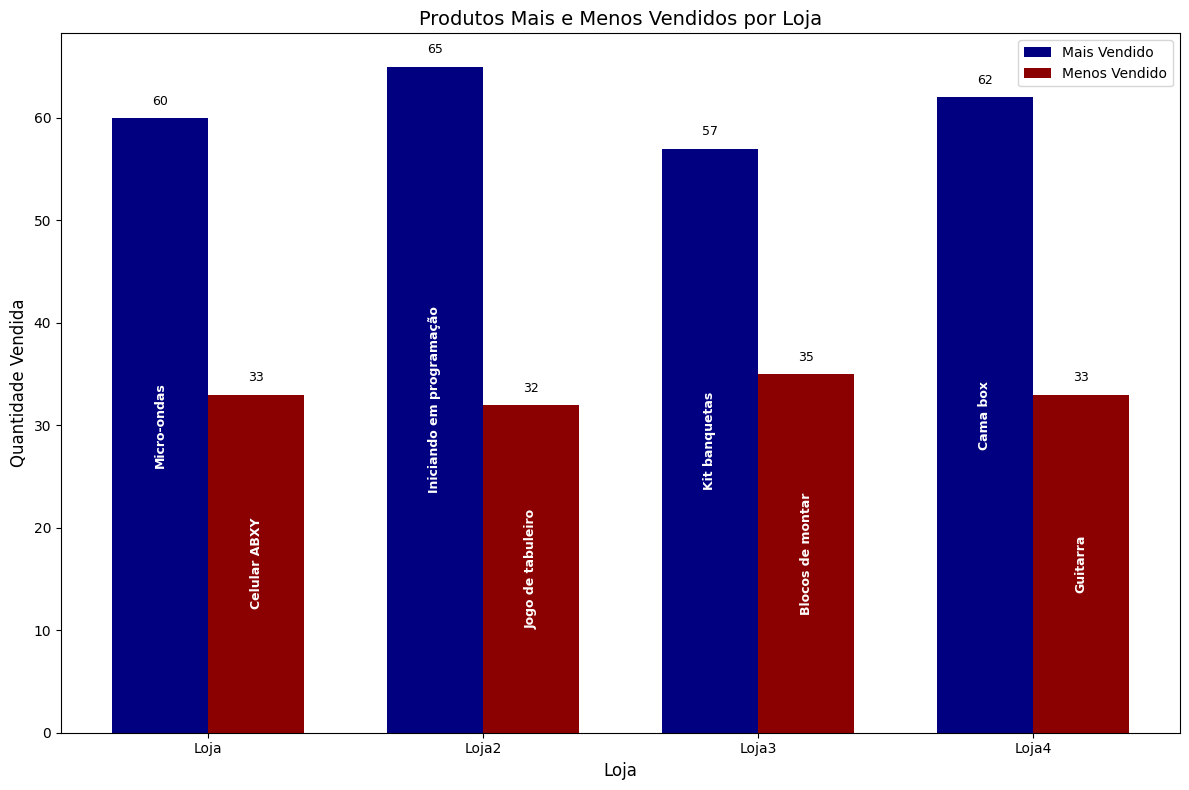

Os valores variam muito não tendo um produto em particular que se destaca em todas as lojas assim como os que vendem menos, teriamos que realizar um levantamento de que produtos em especifico rendem mais em cada loja, para ter uma maior clareza da situação atual das vendas, mas como dito anteriormente nichar o setor de vendas pode trazer problemas de ofertas de produto de mercado, e reduzir o movimento de clientes que possam fazer vendas em paralelo ao produto alvo.

Avaliamos também a média de avaliação que a loja tem, criando uma linha de meta apra as lojas bater de satisfação do cliente setado na nota 4 como podem ver no gráfico:

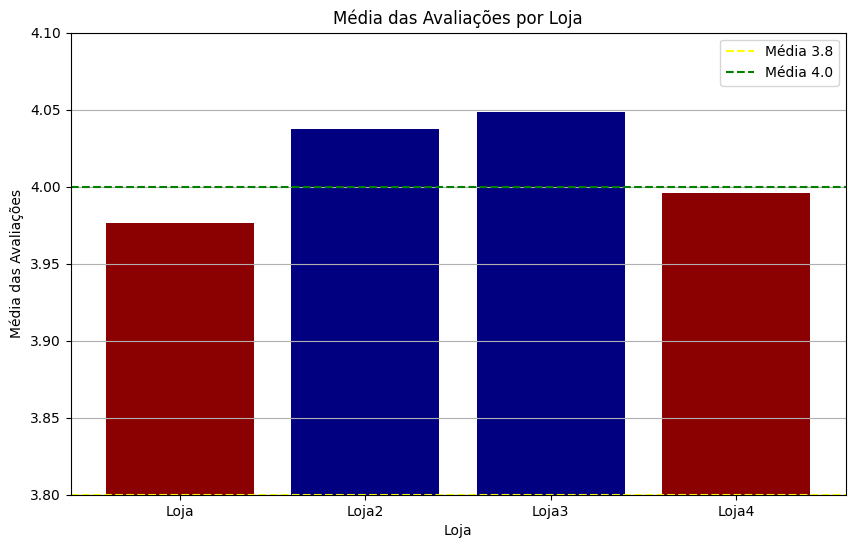

Em destaque a Loja 1 que apesar de ter um faturamento maior apresentou uma média avaliação abaixo do desejado, enquanto a Loja 4 além de ter um faturamento abaixo da meta também apresentou uma meta de avaliação baixa.



Por fim temos o frete médio de cada loja em uma análise:

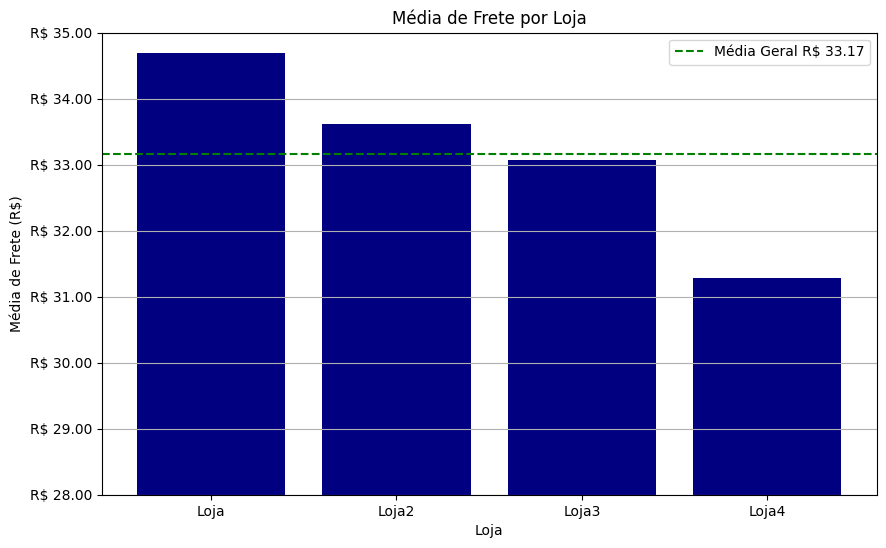

Tendo a Loja 4 com o valor de frente com 2 reais aproximadamente de valor abaixo da média, o que acaba podendo ser um valor de negociação acaba não trazendo tanto resultado assim comparado aos valores acima das demais lojas.
